In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
import ast
import os

In [78]:
base_dir = 'V3'

model_names = [
    'RESNET50',
    'INCEPTION_V3',
    'MOBILENET_V3_L',
    'DENSENET201',
    'WIDE_RESNET50_2'
]

results = {}

for model_name in model_names:

    model_results = {}
    
    scores_file_path = f'{base_dir}/{model_name}/scores.txt'

    if os.path.exists(scores_file_path) and os.path.isfile(scores_file_path):
    
        with open(scores_file_path, 'r') as scores_file:
            lines = scores_file.readlines()

            for line in lines[1:-2]:
                key, value = line.strip().split(': ')
                model_results[key] = float(value)
            for line in lines[-2:]:
                key, value = line.strip().split(': ')
                model_results[key] = ast.literal_eval(value)
    else:
        print(f"Scores.txt file not found in {model_name} directory.")
        
    results[model_name] = model_results

    
# results

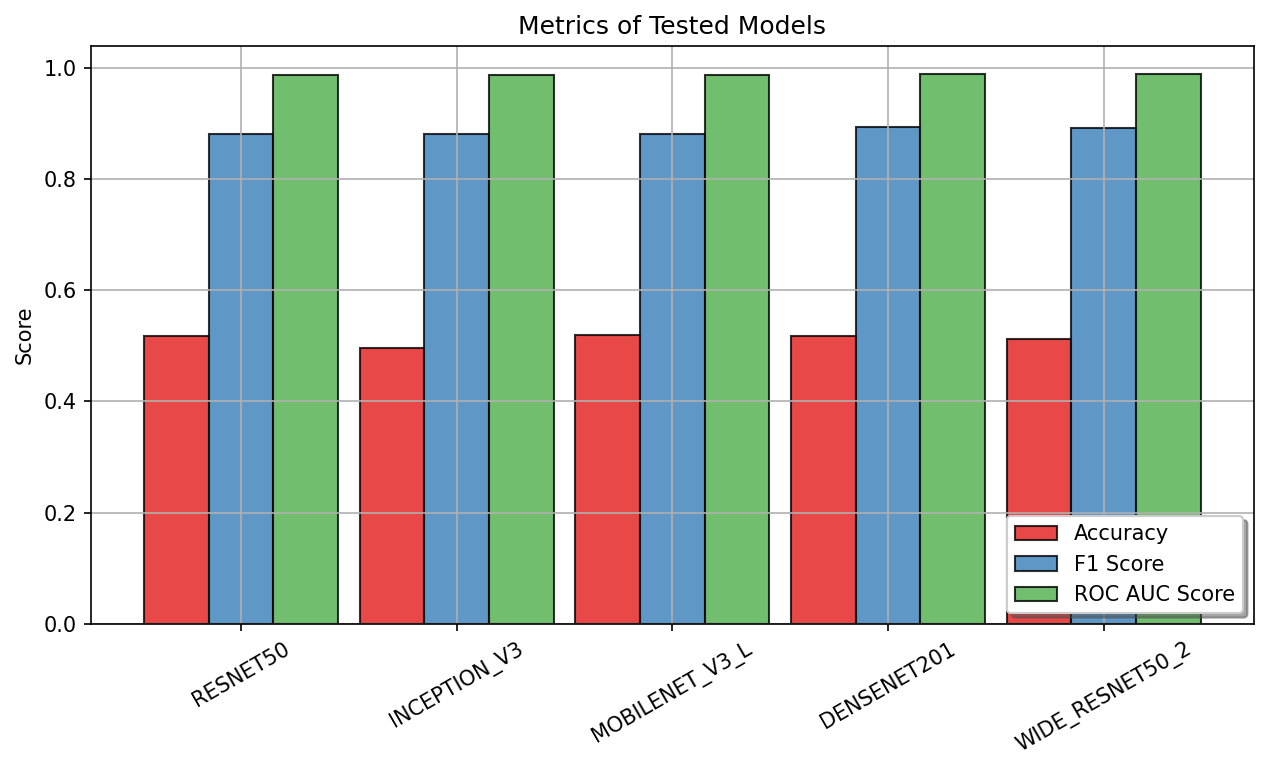

In [85]:
# Define a color palette using seaborn
colors = sns.color_palette("Set1", 3)

bar_width = 0.3

x = np.arange(len(model_names))

y1 = np.array([result['Accuracy'] for result in results.values()])
y2 = np.array([result['F1 Score'] for result in results.values()])
y3 = np.array([result['ROC AUC Score'] for result in results.values()])

# Create a bar plot for Accuracy values
plt.figure(figsize=(10, 5), dpi=150)

plt.ylabel('Score')
plt.title('Metrics of Tested Models')

plt.bar(x - bar_width, y1, bar_width, label='Accuracy', color=colors[0], edgecolor='black', alpha=0.8)
plt.bar(x, y2, bar_width, label='F1 Score', color=colors[1], edgecolor='black', alpha=0.8)
plt.bar(x + bar_width, y3, bar_width, label='ROC AUC Score', color=colors[2], edgecolor='black', alpha=0.8)

plt.xticks(x, model_names, rotation=30)
plt.legend(loc='lower right', fancybox=True, shadow=True)
plt.grid()

plt.savefig(f'{base_dir}/metrics.png', bbox_inches='tight')
plt.show()


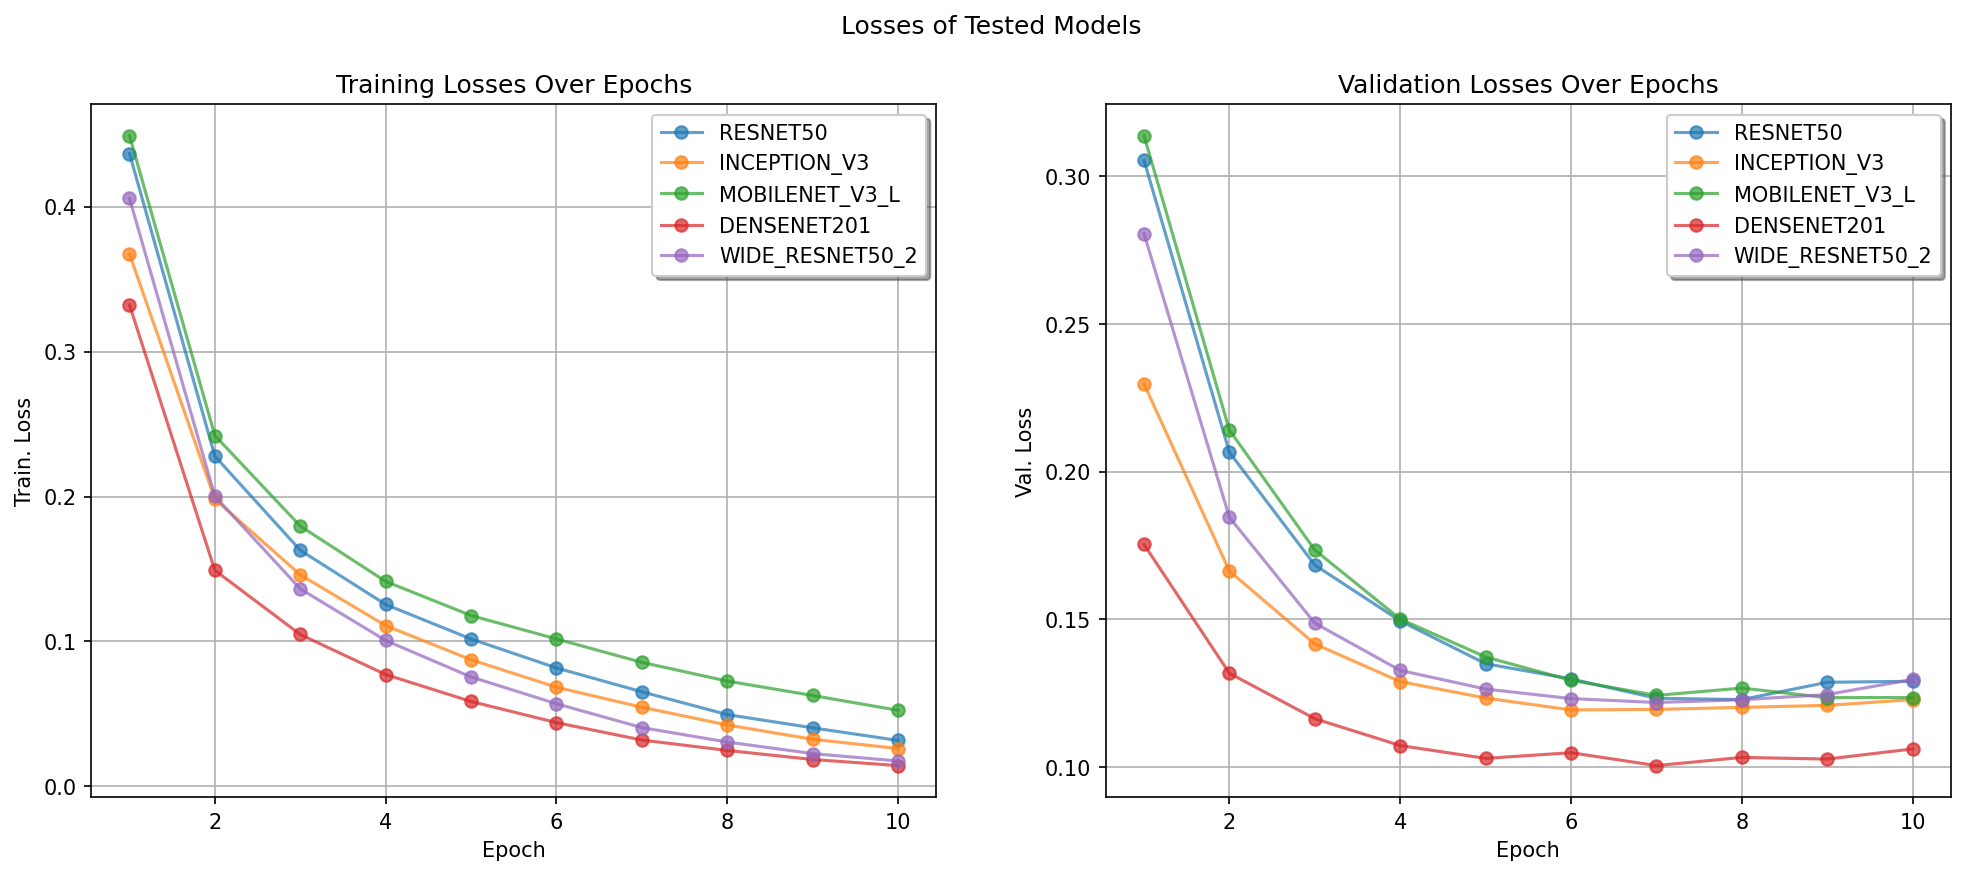

In [4]:
epochs = list(range(1, 11))  # 8 epochs

# Create a single figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), dpi=150)
fig.suptitle('Losses of Tested Models')

i = 0
for result in results.values():
    ax1.plot(epochs, result['Train. Losses'], label=f'{model_names[i]}', marker='o', alpha=0.7)
    ax2.plot(epochs, result['Val. Losses'], label=f'{model_names[i]}', marker='o', alpha=0.7)
    i += 1

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Train. Loss')
ax1.set_title('Training Losses Over Epochs')
ax1.legend(loc='upper right', ncol=1, fancybox=True, shadow=True)
ax1.grid(True)

ax2.set_xlabel('Epoch')
ax2.set_ylabel('Val. Loss')
ax2.set_title('Validation Losses Over Epochs')
ax2.legend(loc='upper right', ncol=1, fancybox=True, shadow=True)
ax2.grid(True)

plt.savefig(f'{base_dir}/losses.png', bbox_inches='tight')
plt.show()
